In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.preprocessing import MinMaxScaler
import warnings

In [2]:
warnings.filterwarnings('ignore')
data = pd.read_csv("../data/train.csv")

In [3]:
time_sales = data[['Date', 'Sales']]
time_sales['Date']=pd.to_datetime(time_sales['Date'])
indexed_time = time_sales.set_index(['Date'])
indexed_time

,Sales
Date,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822
...,...
2013-01-01,0
2013-01-01,0
2013-01-01,0


In [4]:
#scale sales
scaler = MinMaxScaler()
scaler.fit(indexed_time.Sales.values.reshape([-1, 1]))
Scaled = scaler.transform(indexed_time.Sales.values.reshape(-1, 1))
indexed_time['Scaled_Sales'] = Scaled
indexed_time.head(10)

,Sales,Scaled_Sales
Date,,
2015-07-31,5263,0.126664
2015-07-31,6064,0.145941
2015-07-31,8314,0.200091
2015-07-31,13995,0.336815
2015-07-31,4822,0.116050
2015-07-31,5651,0.136002
2015-07-31,15344,0.369281
2015-07-31,8492,0.204375
2015-07-31,8565,0.206132


In [5]:
indexed_time.describe()

,Sales,Scaled_Sales
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,1.389574e-01
std,3.849926e+03,9.265544e-02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,8.969700e-02
50%,5.744000e+03,1.382398e-01
75%,7.856000e+03,1.890689e-01
max,4.155100e+04,1.000000e+00


TIME SERIES PLOT

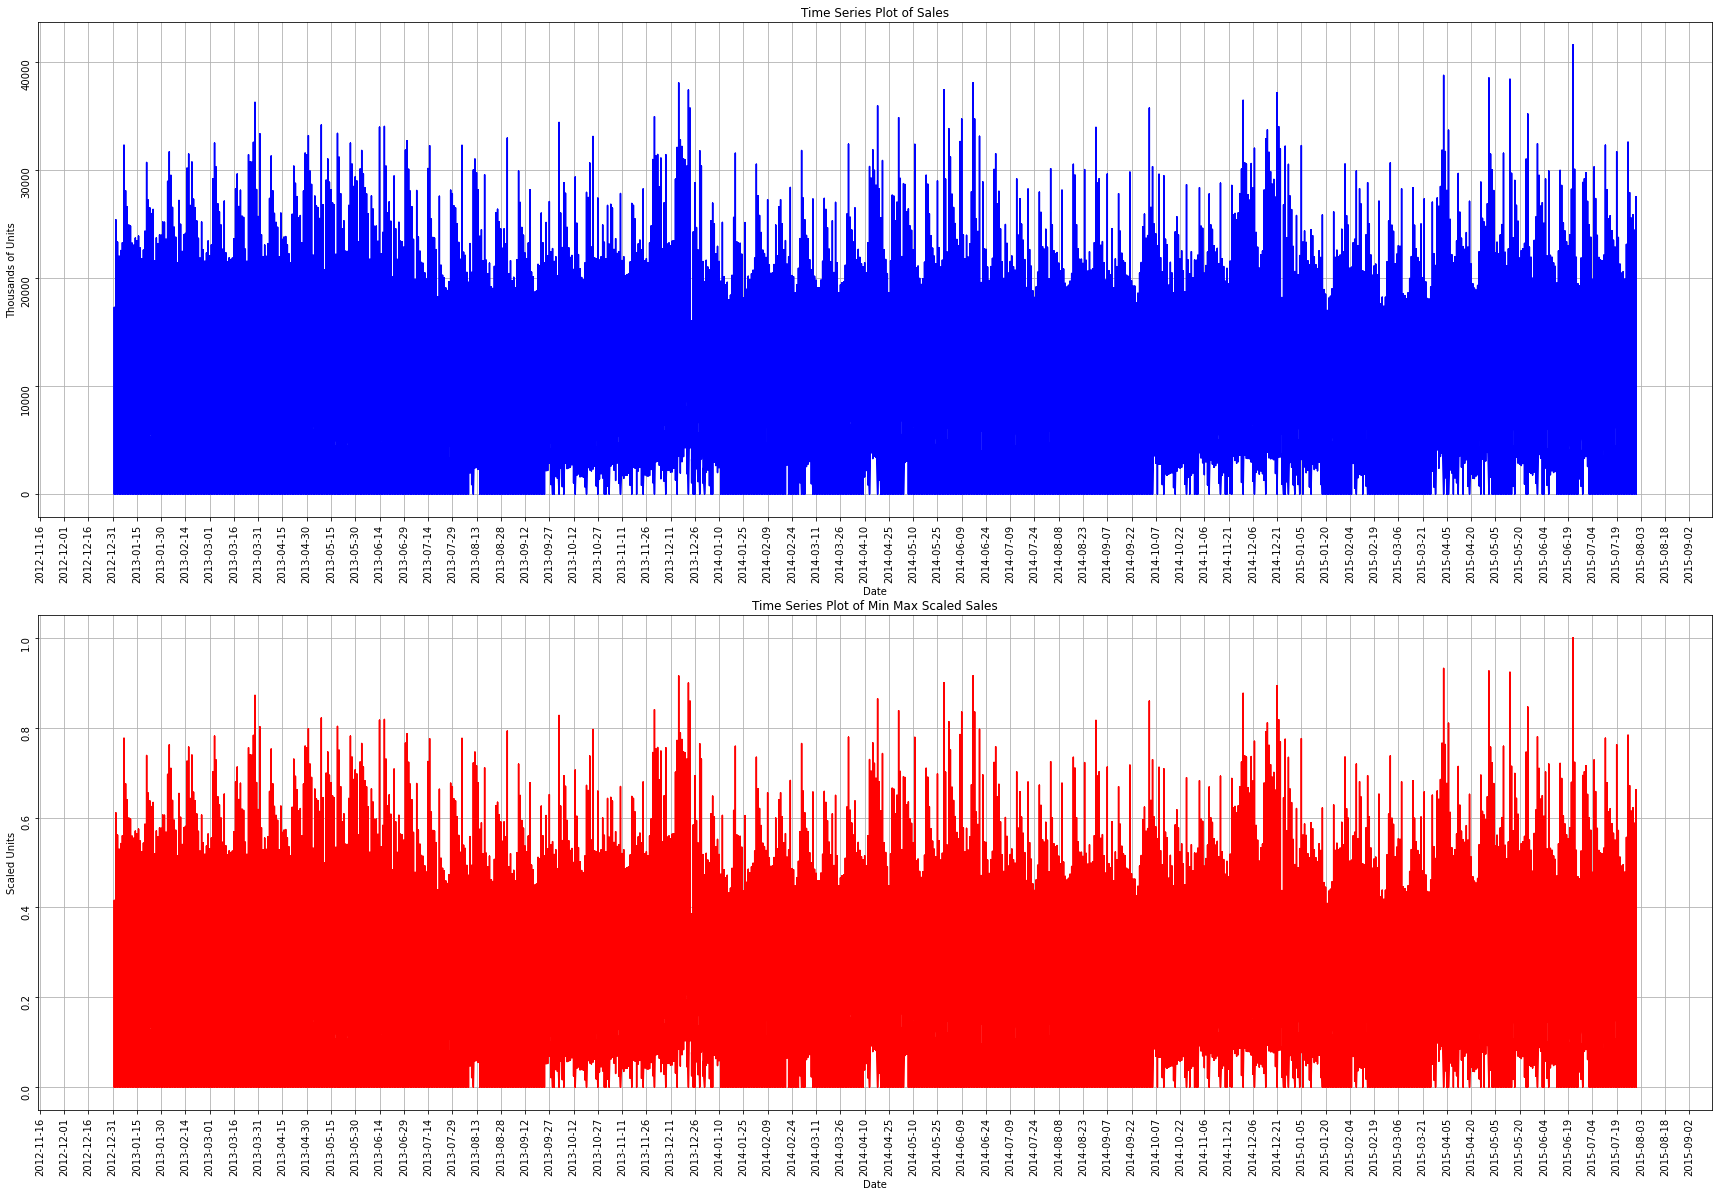

In [6]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(indexed_time.index, indexed_time.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Thousands of Units')
ax1.title.set_text('Time Series Plot of Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(indexed_time.index, indexed_time.Scaled_Sales, 'r-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled Units')
ax2.title.set_text('Time Series Plot of Min Max Scaled Sales')
ax2.grid(True)
plt.show()

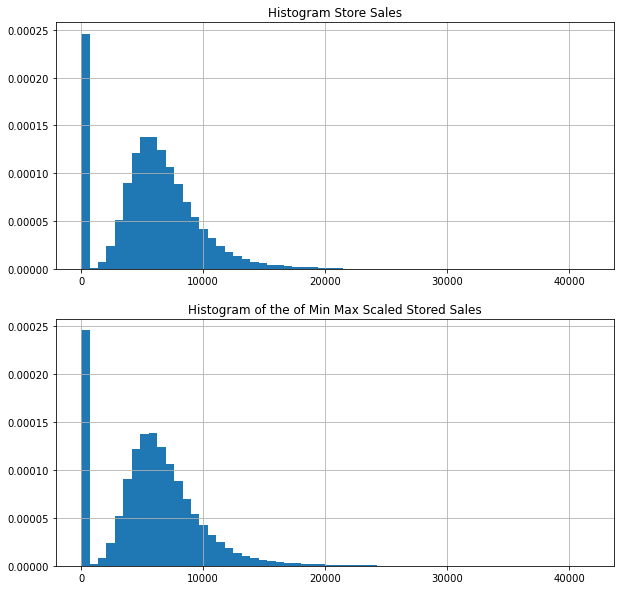

In [7]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout(pad=6)

ax1 = fig.add_subplot(gs[0,0])
ax1.hist(indexed_time.Sales, density=True, bins=60)
ax1.title.set_text('Histogram Store Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.hist(indexed_time.Sales, density=True, bins=60)
ax2.title.set_text('Histogram of the of Min Max Scaled Stored Sales')
ax2.grid(True)
plt.show()

IS IT STATIONARY?

Unit Root Test

In [8]:
sample = indexed_time.sample(n=300000)
adfResult = adfuller(sample.Sales.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')

ADF Statistic: -547.2169374164279
p-value: 0.0
